In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


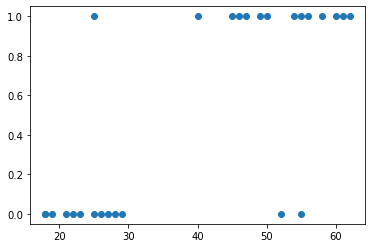

In [3]:
plt.scatter(df.age,df.bought_insurance)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test, y_train, y_test =train_test_split(df[['age']],df.bought_insurance,test_size = 0.1)

In [6]:
X_test

,age
19,18
14,49
23,45


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()

In [9]:
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
model.predict(X_test)

array([0, 1, 1], dtype=int64)

In [11]:
model.score(X_test,y_test)

1.0

In [12]:
model.predict_proba(X_test)

array([[0.94204165, 0.05795835],
       [0.24458363, 0.75541637],
       [0.349232  , 0.650768  ]])

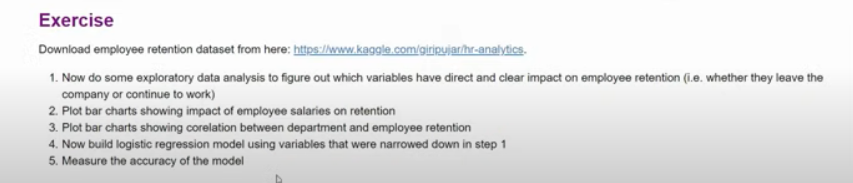

In [13]:
df_ex = pd.read_csv('../datasets/HR_comma_sep.csv')
df_ex.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
df_ex[df_ex.left==1].shape

(3571, 10)

In [16]:
df_ex[df_ex.left==0].shape

(11428, 10)

In [17]:
df_ex.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

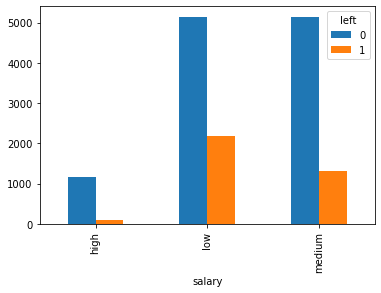

In [19]:
pd.crosstab(df_ex.salary,df_ex.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

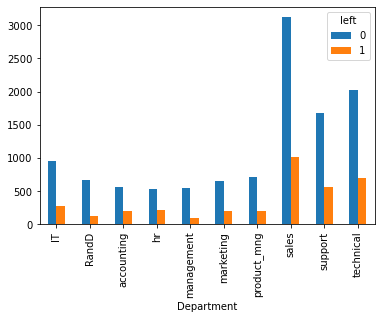

In [20]:
pd.crosstab(df_ex.Department,df_ex.left).plot(kind='bar')

In [21]:
subdf = df_ex[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [23]:
salary_dummies = pd.get_dummies(subdf.salary,prefix='salary')
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [24]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [27]:
X = df_with_dummies.drop(['salary','salary_high'],axis='columns')
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0


In [28]:
y = df_ex.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
model_ex = LogisticRegression()
model_ex.fit(X_train,y_train)

LogisticRegression()

In [30]:
model_ex.score(X_test,y_test)

0.7753333333333333